# Shanghai pollutant data prediction using LSTM Regularized Tensor Factorization

> About the author: Jinming Yang (yangjm67@sjtu.edu.cn), Center for Intelligent Transportation Systems and Unmanned Aerial Systems Applications Research, School of Naval Architecture, Ocean and Civil Engineering, Shanghai Jiao Tong University, Shanghai 200240, China. 

## Data Organization: Tensor Structure

We consider a high dimensional dataset collected from $M$ sensors for $T$ time steps. Each sensor collects $N$ different kinds of data. We express spatio-temporal dataset as a tensor $\mathcal{Y}\in\mathbb{R}^{M\times N\times T}$. The three way tensor $\mathcal{Y}$ can be factorized into three low rank feature matrices: spatial feature matrix $\boldsymbol{U}\in \mathbb{R}^{M\times r}$, data type feature matrix $\boldsymbol{V}\in \mathbb{R}^{N\times r}$ and temporal feature matrix $\boldsymbol{X}\in \mathbb{R}^{T\times r}$.


## Long-short Term Memory Regularized Tensor Factorization(LSTM-ReTF)

LSTM Regularized Tensor Factorization (LSTM-ReTF) is an approach to incorporate temporal dependencies into tensor CP factorization model which utilizes the well-studied Long-short term memory(LSTM) neural network to model temporal dependencies among temporal feature vectors ${\boldsymbol{x}_t}$ explicitly. Let $f()$ stands for the feed forward process of the LSTM network temporal regularizer, then the temporal dependencies can be described as follows:

$$
\boldsymbol{x}'_t = f(\boldsymbol{x}_{t-l_1},\boldsymbol{x}_{t-l_2},...,\boldsymbol{x}_{t-l_d})
$$

Where the lag set $\mathcal{L}=\left\{l_1,l_2,...,l_d\right\}$ (e.g., $\mathcal{L}=\left\{1,2,...,24\right\}$) indicates  the temporal correlation topology. We further define the LSTM temporal regularizer as follows:

$$\mathcal{R}_{t}\left(X, var(f)\right) = \frac{1}{2}\sum_{t=l_d}^n\biggl(x_t - f(x_{t-l_1},x_{t-l_2},...,x_{t-l_d})\biggr)^2$$

where, $var(f)$ stands for the coefficient set in LSTM network, and $f()$ is the feed forward process of the LSTM network.

Thus, LSTM-ReTF is given by solving
$$
\min_{U,V,X,\text{var}(f)}~~\sum_{(i,k,t)\in\Omega}\left(y_{ijt}-\sum_{r=1}^{R}u_{ir}v_{jr}x_{tr}\right)^2
+\frac{\lambda_{w}\eta}{2}\sum_{i=1}^{M}\left\|\boldsymbol{w}_{i}\right\|_{2}^{2}+\frac{\lambda_{v}\eta}{2}\sum_{k=1}^{N}\left\|\boldsymbol{v}_{k}\right\|_{2}^{2}+\frac{\lambda_{x}\eta}{2}\sum_{t=1}^{T}\left\|\boldsymbol{x}_{t}\right\|_{2}^{2}
+\underbrace{\frac{\lambda_x}{2}\sum_{t=l_d+1}^n\biggl(\boldsymbol{x}_t - \boldsymbol{x}'_t\biggr)^2}_{\text{LSTM network temporal regularizer}}
$$


### Solving the above minimization problem using alternative least square method(ALS)

#### Updates for spatial feature vectors $\boldsymbol{w}_i, i = 1, 2, ..., M$
$$
\boldsymbol{w}_{i}^{(p+1)} =  \left(\sum_{k,t:(i,k,t)\in\Omega}\left(\boldsymbol{v}_{k}^{(p)}\circledast\boldsymbol{x}_{t}^{(p)}\right)\left(\boldsymbol{v}_{k}^{(p)}\circledast\boldsymbol{x}_{t}^{(p)}\right)^{\top}+\lambda_{w}\eta I\right)^{-1}  \left(\sum_{k,t:(i,k,t)\in\Omega}\left(\boldsymbol{v}_{k}^{(p)}\circledast\boldsymbol{x}_{t}^{(p)}\right)y_{ikt}\right)
$$

#### Updates for data type feature vectors $\boldsymbol{v}_k, k = 1, 2, ..., N$
$$
\boldsymbol{v}_{k}^{(p+1)} = \left(\sum_{i,t:(i,k,t)\in\Omega}\left(\boldsymbol{w}_{i}^{(p+1)}\circledast\boldsymbol{x}_{t}^{(p)}\right)\left(\boldsymbol{w}_{i}^{(p+1)}\circledast\boldsymbol{x}_{t}^{(p)}\right)^{\top}+\lambda_{v}I\right)^{-1}\sum_{i,t:(i,k,t)\in\Omega}\left(\boldsymbol{w}_{i}^{(p+1)}\circledast\boldsymbol{x}_{t}^{(p)}\right)y_{ikt}
$$

#### Updates for temporal feature vectors $\boldsymbol{x}_t, t = 1, 2, ..., l_d$
$$
\boldsymbol{x}_{t}^{(p+1)} = \biggl(\sum_{i,k:(i,k,t)\in\Omega}\left(\boldsymbol{w}_{i}^{(p+1)}\circledast\boldsymbol{v}_{k}^{(p+1)}\right)\left(\boldsymbol{w}_{i}^{(p+1)}\circledast\boldsymbol{v}_{k}^{(p+1)}\right)^{\top}+\lambda_x\eta I \biggr)^{-1} \biggl(\sum_{i,k:(i,k,t)\in\Omega}\left(\boldsymbol{w}_{i}^{(p+1)}\circledast\boldsymbol{v}_{k}^{(p+1)}\right)y_{ikt}\biggr)
$$

#### Updates for temporal vectors $\boldsymbol{x}_t, t = l_d + 1, l_d + 2, ..., T$
$$
\boldsymbol{x}_{t}^{(p+1)} = \biggl(\sum_{i,k:(i,k,t)\in\Omega}\left(\boldsymbol{w}_{i}^{(p+1)}\circledast\boldsymbol{v}_{k}^{(p+1)}\right)\left(\boldsymbol{w}_{i}^{(p+1)}\circledast\boldsymbol{v}_{k}^{(p+1)}\right)^{\top} + \lambda_x\eta I+\lambda_x I \biggr)^{-1} \biggl(\sum_{i,k:(i,k,t)\in\Omega}\left(\boldsymbol{w}_{i}^{(p+1)}\circledast\boldsymbol{v}_{k}^{(p+1)}\right)y_{ikt} + \lambda_x {{\boldsymbol{x}'_t}^{(p+1)}} \biggr)
$$

where $\circledast$ denotes element-wise product and ${{\boldsymbol{x}'_t}^{(p+1)}} = f(\boldsymbol{x}_{t-l_1}^{(p+1)},\boldsymbol{x}_{t-l_2}^{(p+1)},...,\boldsymbol{x}_{t-l_d}^{(p+1)}| \text{var}(f)^{(p)})$.

In [2]:
import numpy as np
import scipy.io
from numpy.linalg import inv as inv
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from sklearn.preprocessing import MinMaxScaler
import time

## Some Computation Concepts

### Kronecker product

- **Definition**:

Given two matrices $A\in\mathbb{R}^{m_1\times n_1}$ and $B\in\mathbb{R}^{m_2\times n_2}$, then, the **Kronecker product** between these two matrices is defined as

$$A\otimes B=\left[ \begin{array}{cccc} a_{11}B & a_{12}B & \cdots & a_{1m_2}B \\ a_{21}B & a_{22}B & \cdots & a_{2m_2}B \\ \vdots & \vdots & \ddots & \vdots \\ a_{m_11}B & a_{m_12}B & \cdots & a_{m_1m_2}B \\ \end{array} \right]$$
where the symbol $\otimes$ denotes Kronecker product, and the size of resulted $A\otimes B$ is $(m_1m_2)\times (n_1n_2)$ (i.e., $m_1\times m_2$ columns and $n_1\times n_2$ rows).

- **Example**:

If $A=\left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \\ \end{array} \right]$ and $B=\left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10 \\ \end{array} \right]$, then, we have

$$A\otimes B=\left[ \begin{array}{cc} 1\times \left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10\\ \end{array} \right] & 2\times \left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10\\ \end{array} \right] \\ 3\times \left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10\\ \end{array} \right] & 4\times \left[ \begin{array}{ccc} 5 & 6 & 7\\ 8 & 9 & 10\\ \end{array} \right] \\ \end{array} \right]$$

$$=\left[ \begin{array}{cccccc} 5 & 6 & 7 & 10 & 12 & 14 \\ 8 & 9 & 10 & 16 & 18 & 20 \\ 15 & 18 & 21 & 20 & 24 & 28 \\ 24 & 27 & 30 & 32 & 36 & 40 \\ \end{array} \right]\in\mathbb{R}^{4\times 6}.$$

### Khatri-Rao product (`kr_prod`)

- **Definition**:

Given two matrices $A=\left( \boldsymbol{a}_1,\boldsymbol{a}_2,...,\boldsymbol{a}_r \right)\in\mathbb{R}^{m\times r}$ and $B=\left( \boldsymbol{b}_1,\boldsymbol{b}_2,...,\boldsymbol{b}_r \right)\in\mathbb{R}^{n\times r}$ with same number of columns, then, the **Khatri-Rao product** (or **column-wise Kronecker product**) between $A$ and $B$ is given as follows,

$$A\odot B=\left( \boldsymbol{a}_1\otimes \boldsymbol{b}_1,\boldsymbol{a}_2\otimes \boldsymbol{b}_2,...,\boldsymbol{a}_r\otimes \boldsymbol{b}_r \right)\in\mathbb{R}^{(mn)\times r}$$
where the symbol $\odot$ denotes Khatri-Rao product, and $\otimes$ denotes Kronecker product.

- **Example**:

If $A=\left[ \begin{array}{cc} 1 & 2 \\ 3 & 4 \\ \end{array} \right]=\left( \boldsymbol{a}_1,\boldsymbol{a}_2 \right) $ and $B=\left[ \begin{array}{cc} 5 & 6 \\ 7 & 8 \\ 9 & 10 \\ \end{array} \right]=\left( \boldsymbol{b}_1,\boldsymbol{b}_2 \right) $, then, we have

$$A\odot B=\left( \boldsymbol{a}_1\otimes \boldsymbol{b}_1,\boldsymbol{a}_2\otimes \boldsymbol{b}_2 \right) $$

$$=\left[ \begin{array}{cc} \left[ \begin{array}{c} 1 \\ 3 \\ \end{array} \right]\otimes \left[ \begin{array}{c} 5 \\ 7 \\ 9 \\ \end{array} \right] & \left[ \begin{array}{c} 2 \\ 4 \\ \end{array} \right]\otimes \left[ \begin{array}{c} 6 \\ 8 \\ 10 \\ \end{array} \right] \\ \end{array} \right]$$

$$=\left[ \begin{array}{cc} 5 & 12 \\ 7 & 16 \\ 9 & 20 \\ 15 & 24 \\ 21 & 32 \\ 27 & 40 \\ \end{array} \right]\in\mathbb{R}^{6\times 2}.$$

In [3]:
def kr_prod(a, b):
    return np.einsum('ir, jr -> ijr', a, b).reshape(a.shape[0] * b.shape[0], -1)

In [4]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8], [9, 10]])
print(kr_prod(A, B))

[[ 5 12]
 [ 7 16]
 [ 9 20]
 [15 24]
 [21 32]
 [27 40]]


### Function to combine feature matrices to data tensor

In [5]:
def cp_combine(U, V, X):
    return np.einsum('is, js, ts -> ijt', U, V, X)

### Function to unfold tensor to matrix along specific dimension

In [6]:
def ten2mat(tensor, mode):
    return np.reshape(np.moveaxis(tensor, mode, 0), (tensor.shape[mode], -1), order = 'F')

### Load the Shanghai pollutant concentration data set
Shanghai pollutant concentration dataset is stored in a 12 by 6 by 15768 matrix.
- **12** stands for 12 different monitoring stations in Shanghai.
- **6** stands for 6 different kinds of pollutants: NO2 CO PM2.5 PM10 SO2 O3.
- **15768** stands for 15768 hours from 2017-2019. (only 10000 is used in the experiments)

In [7]:
import scipy.io

tensor = scipy.io.loadmat('../datasets/Shanghai-pollutant-dataset/NTS_tensor.mat')
dense_tensor = tensor['tensor']

print('The shape of the initial dataset is:')
print(dense_tensor.shape)
dim1, dim2, dim3 = dense_tensor.shape
missing_rate = 0.4

# # =============================================================================
# ### Random missing (PM) scenario
# ### Set the PM scenario by:
tensor = scipy.io.loadmat('../datasets/Shanghai-pollutant-dataset/NTS_random_tensor.mat')
random_tensor = tensor['tensor']
binary_tensor = np.ones((dim1, dim2, dim3))
binary_tensor[random_tensor < missing_rate] = 0 

# # =============================================================================
### Non random missing (CM) scenario
# ### Set the CM scenario by:
# missing_period = 6 #data missing in continuous [6, 12, 24, 48] hours
# random_array_file = '../datasets/Shanghai-pollutant-dataset/NTS_random_array' + str(missing_period) + '.mat'
# tensor = scipy.io.loadmat(random_array_file)
# random_array = tensor['array'][0]
# dense_tensor = np.random.rand(dim1,dim2,dim3)
# binary_reshape_tensor = np.ones_like(dense_tensor)
# binary_reshape_tensor = binary_reshape_tensor.reshape(dim1,dim2,int(dim3 / missing_period),missing_period)
# pos = np.where(random_array < missing_rate)
# binary_reshape_tensor[:, :, pos, :] = 0
# binary_tensor = binary_reshape_tensor.reshape(dim1, dim2, dim3)
# sparse_tensor = np.multiply(dense_tensor, binary_tensor)

sparse_tensor = np.multiply(dense_tensor, binary_tensor)

The shape of the initial dataset is:
(12, 6, 15768)


In [8]:
dense_tensor = dense_tensor[:, :, 5768:]
sparse_tensor = sparse_tensor[:, :, 5768:]
print(sparse_tensor.shape)

(12, 6, 10000)


## Problem setting
This work mainly focuses on spatiotemporal data online prediction and impute possible missing entries during real time data observation.

### Creating training set and test set

In [9]:
test_rate = 0.082

train_len = int((1 - test_rate) * sparse_tensor.shape[2])
test_len = sparse_tensor.shape[2] - train_len
# test_len = 24 * 7
train_len = sparse_tensor.shape[2] - test_len
training_set = sparse_tensor[:, :, :train_len]
test_set = sparse_tensor[:, :, train_len:]
print('The size of training set is:')
print(training_set.shape)
print()
print('The size of test set is:')
print(test_set.shape)

The size of training set is:
(12, 6, 9180)

The size of test set is:
(12, 6, 820)


### Saving ground truth(real value)

In [10]:
training_ground_truth = dense_tensor[:, :, :train_len]
test_ground_truth = dense_tensor[:, :, train_len:]
print('The size of training set ground truth is:')
print(training_ground_truth.shape)
print()
print('The size of test set ground truth is:')
print(test_ground_truth.shape)

The size of training set ground truth is:
(12, 6, 9180)

The size of test set ground truth is:
(12, 6, 820)


## Train LSTM-ReTF spatial temporal feature matrices and LSTM coefficients

Bofore moving to the online prediction part of the framework, static data features(spatial feature matrix `W`, data type feature matrix `V` and temporal feature matrix `X`) and LSTM network coefficients(`var(f)`) should be trained first.

The following function is used to generate training samples for the LSTM neural network:

- `dataset` is the spatial temporal matrix(training data matrix).
- `rate` ranging from $(0, 1]$ stands for the sampling rate.
- `time_lags` stands for the leg set which denotes the temporal correlation topology.

In [11]:
def create_lstm_samples(dataset, time_lags, rate):
    dataX, dataY = [], []
    data_len = dataset.shape[0] - np.max(time_lags)
    t_sample = np.random.choice(data_len, int(rate * data_len), replace = False)
    
    for t in t_sample:
        a = dataset[t + np.max(time_lags) - time_lags, :][::-1]
        dataX.append(a)
        dataY.append(dataset[t + np.max(time_lags), :])
    return np.array(dataX), np.array(dataY)

The following function creates a LSTM network temporal regularizer. The input layer of the network has `rank` number of units, the LSTM layer has `rank` number of units and the full connection layer also has `rank` number of units.

In [12]:
def lstmmodel(rank, lag_len):
    # create the LSTM network
    model = Sequential()
#     model.add(LSTM(rank, input_shape = (lag_len, rank), return_sequences = True)) # If you need multi-layer LSTM
    model.add(LSTM(rank, input_shape = (lag_len, rank)))
    model.add(Dense(rank))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

## Error calculator
<div class="alert alert-block alert-warning">
<ul>
<li><b><code>mean_absolute_percentage_error</code>:</b> <font color="black">Compute the value of Mean Absolute Percentage Error (MAPE).</font></li>
<li><b><code>root_mean_squared_error</code>:</b> <font color="black">Compute the value of Root Mean Square Error (RMSE).</font></li>
</ul>
</div>

> Note that $$\mathrm{MAPE}=\frac{1}{n} \sum_{i=1}^{n} \frac{\left|y_{i}-\hat{y}_{i}\right|}{y_{i}} \times 100, \quad\mathrm{RMSE}=\sqrt{\frac{1}{n} \sum_{i=1}^{n}\left(y_{i}-{y}'_{i}\right)^{2}},$$ where $n$ is the total number of estimated values, and $y_i$ and ${y}'_i$ are the actual value and its estimation, respectively.

In [13]:
def mean_absolute_percentage_error(y_true, y_pred, pos): 
    return np.mean(np.abs((y_true[pos] - y_pred[pos]) / y_true[pos])) * 100
def root_mean_squared_error(y_true, y_pred, pos): 
    return np.sqrt(np.mean(np.square(y_true[pos] - y_pred[pos])))

### LSTM-ReTF training algorithm

The function **LSTM_ReTF** is used to train spatial temporal feature matrices and LSTM network parameters.

- `sparse_tensor` is the training set spatial temporal tensor.
- `init` is the initiated hyperparameters of LSTM-ReMF which includes the initiated spatial matrix `W` and the initiated temporal matrix `X`.
- `time_lags` stands for the leg set which denotes the temporal correlation topology.
- `lambda_w`, `lambda_x` and `eta` are regularizer parameters. 
- `sampling rate` is the ratio of data used to train the LSTM-full connection network.
- `maxiter` is the maxiter time.
- `track` is a 0 or 1 parameter that indicates whether to compute errors while training.
- `patience` is the tolerance waiting step number. It is only required when `track` variable is 1.
- `dense_tensor` is the training ground truth without data missing simulation. It is only required when `track` variable is 1.

In [14]:
def LSTM_ReTF(sparse_tensor, init, time_lags, lambda_w, lambda_v, lambda_x, eta, sampling_rate, maxiter, track, dense_tensor = 0):
    W = init["W"]
    V = init["V"]
    X = init["X"]
    dim1, dim2, dim3 = sparse_tensor.shape
    binary_tensor = np.zeros((dim1, dim2, dim3))
    position = np.where((sparse_tensor != 0))
    binary_tensor[position] = 1
    d = len(time_lags)
    max_lags = np.max(time_lags)
    r = X.shape[1]
    if track:
        pos = np.where((sparse_tensor == 0) & (dense_tensor != 0))
    model = lstmmodel(r, d)
    model_reverse = lstmmodel(r, d)
    start_time = time.time()
    for iters in range(maxiter):
        var1 = kr_prod(X, V).T #(r, n*t)
        var2 = kr_prod(var1, var1) # (r*r, n*t) 
        mat1 = ten2mat(binary_tensor, 0).T # (n*t, m)
        mat2 = ten2mat(sparse_tensor, 0).T # (n*t, m)
        for i in range(dim1):
            var_Lambda1 = np.matmul(var2, mat1[:, i]).reshape([rank, rank]) + lambda_w * eta * np.eye(rank)
            inv_var_Lambda1 = np.linalg.inv((var_Lambda1 + var_Lambda1.T)/2)
            W[i, :] = np.matmul(inv_var_Lambda1, np.matmul(var1, mat2[:, i]))

        var1 = kr_prod(X, W).T
        var2 = kr_prod(var1, var1)
        mat1 = ten2mat(binary_tensor, 1).T # (m*t, n)
        mat2 = ten2mat(sparse_tensor, 1).T # (m*t, n)
        for j in range(dim2):
            var_Lambda1 = np.matmul(var2, mat1[:, j]).reshape([rank, rank]) + lambda_v * eta * np.eye(rank)
            inv_var_Lambda1 = np.linalg.inv((var_Lambda1 + var_Lambda1.T)/2)
            V[j, :] = np.matmul(inv_var_Lambda1, np.matmul(var1, mat2[:, j]))
        
        var1 = kr_prod(V, W).T # (r, m*n)
        var2 = kr_prod(var1, var1) # (r*r, m*n)
        mat1 = ten2mat(binary_tensor, 2).T # (m*n, n)
        mat2 = ten2mat(sparse_tensor, 2).T # (m*n, n)
        for t in range(dim3):
            if iters == 0 or t < max_lags:
                var_Lambda1 = np.matmul(var2, mat1[:, t]).reshape([rank, rank]) + lambda_x * eta * np.eye(rank)
                X[t, :] = np.matmul(inv((var_Lambda1 + var_Lambda1.T)/2), np.matmul(var1, mat2[:, t]))
            else:
                var_Lambda1 = np.matmul(var2, mat1[:, t]).reshape([rank, rank]) + lambda_x * np.eye(rank) + lambda_x * eta * np.eye(rank)
                X_hat = X[t - time_lags, :][::-1]
                X_hat_feed = X_hat[np.newaxis, :, :]
                Qt =  model.predict(X_hat_feed)[0]
                X[t, :] = np.matmul(inv((var_Lambda1 + var_Lambda1.T)/2),
                                       (np.matmul(var1, mat2[:, t]) + lambda_x * Qt))
        
        if iters == 0:
            lstmX, lstmY = create_lstm_samples(X, time_lags, 1)
            model.fit(lstmX, lstmY, epochs=20, batch_size=50, verbose=0)
        else:
            lstmX, lstmY = create_lstm_samples(X, time_lags, sampling_rate)
            model.fit(lstmX, lstmY, epochs=1, batch_size=200, verbose=0)
        if (iters + 1) % 50 == 0:
            print('Iterations: %d, time cost: %ds'%((iters + 1), (time.time() - start_time)))
            start_time = time.time()
            if track:
                tensor_hat = cp_combine(W, V, X)
                tensor_hat[position] = sparse_tensor[position]
                tensor_hat[tensor_hat < 0] = 0
                rmse = root_mean_squared_error(dense_tensor, tensor_hat, pos)
                mape = mean_absolute_percentage_error(dense_tensor, tensor_hat, pos)
                print('Imputation RMSE = %.2f'%rmse)
                print('Imputation MAPE = %.2f'%mape)
            print()
#     model.save('model_save\lstm_trained1.h5')
    tensor_hat = cp_combine(W, V, X)
    tensor_hat[position] = sparse_tensor[position]
    tensor_hat[tensor_hat < 0] = 0
    return tensor_hat, W, V, X, model

### Training process

In [15]:
rank = 60
maxiter = 200
eta = 0.2
lambda_w = 50
lambda_g = 50
lambda_v = 50
lambda_x = 50
sampling_rate = 1.0
time_lags = np.arange(1, 25, 1)
track = True
dim1, dim2, dim3 = training_set.shape
init = {"W": 0.1 * np.random.rand(dim1, rank), "V": 0.1 * np.random.rand(dim2, rank), "X": 0.1 * np.random.rand(dim3, rank)}
tensor_hat, W, V, X, model = LSTM_ReTF(training_set, init, time_lags, 
                   lambda_w, lambda_v, lambda_x, eta, sampling_rate, maxiter, track, training_ground_truth)

W0816 12:21:48.581377 15564 deprecation_wrapper.py:119] From C:\Users\lenovo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Iterations: 50, time cost: 1340s
Imputation RMSE = 8.74
Imputation MAPE = 27.62

Iterations: 100, time cost: 1230s
Imputation RMSE = 8.65
Imputation MAPE = 28.44

Iterations: 150, time cost: 1344s
Imputation RMSE = 8.43
Imputation MAPE = 27.67

Iterations: 200, time cost: 1331s
Imputation RMSE = 8.33
Imputation MAPE = 26.69



## Online prediction and imputation with Online LSTM-ReTF
In the context of spatiotemporal data online prediction and imputation, LSTM-ReTF takes current observation matrix $\boldsymbol{Y}_{t}\in\mathbb{R}^{M\times N}$ to update the previously predicted temporal feature vector $\boldsymbol{x}'_t$ and impute possible missing entries in real time observation $\boldsymbol{Y}_{t}$. Then, LSTM-ReTF use history temporal feature vectors $\boldsymbol{x}_{t +1 - l}, l\in \mathcal{L}$ to make forecast of future temporal feature vecotr $x_{t+1}$. Finally, forecasted temporal feature vector $\boldsymbol{x}_{t+1}$ will be multiplied by spatial embedding $\boldsymbol{W}$ to calculate future data.

Utilize pre-trained spatial feature matrix **W** of size [12, r], pre-trained data type feature matrix **V** of size [6, r], pre-trained LSTM coefficients **var(f)**, prestep temporal feature matrix **X0** of size [max(time_lags), r] and observations(may be incomplete) to make predictions of the next time step.

### 1. Current temporal embedding $x_t$ calibration
At time slot $t$, the newly observed data matrix $\boldsymbol{Y}_t\in\mathbb{R}^{M\times N}$ comes in, online LSTM-ReTF framework calibrates the previously predicted temporal feature vector $\boldsymbol{x}'_t$. The calibrated temporal feature vector $x_t$ can be derived from the following optimization problem:
$$
\min_{\boldsymbol{x}_t}~~\sum_{(i,j)\in\Omega_t}\left(y_{ij,t}-\sum_{r=1}^{R}u_{ir}v_{jr}x_{tr}\right)^2+\frac{\lambda_{x}\eta}{2}\sum_{t=1}^{T}\left\|\boldsymbol{x}_{t}\right\|_{2}^{2}+\underbrace{\frac{\lambda_x}{2}\sum_{t=l_d+1}^n\biggl(\boldsymbol{x}_t - \boldsymbol{x}'_t\biggr)^2}_{\text{LSTM network regularizer}}
$$
where $\Omega_{t}$ denotes the observed entries in the real time observation matrix $\boldsymbol{Y}_{t}$.

This optimizatoin problem can be solved by least square method, the uodating formulation for temporal embeddding $x_t$ can be derived as follows:
$$
\boldsymbol{x}_{t} = \biggl(\sum_{(i,j)\in\Omega_{t}}(\boldsymbol{w}_i\circledast \boldsymbol{v}_j)(\boldsymbol{w}_i\circledast \boldsymbol{v}_j)^\top + \lambda_x I+\lambda_x\eta I \biggr)^{-1}\biggl(\sum_{(i,j)\in\Omega_{t}}y_{ij,t}(\boldsymbol{w}_i\circledast \boldsymbol{v}_j) + \lambda_x \boldsymbol{x}'_{t} \biggr)
$$

### 2. Missing data imputation in current observation matrix $\boldsymbol{Y}_{t}$
With calibrated temporal feature vector $\boldsymbol{x}_{t}$ and the pre-trained spatial feature matrix $\boldsymbol{W}$, pre-trained data type feature matrix $\boldsymbol{V}$, we can make imputation of the current observation by:
$$
{\hat{\boldsymbol{Y}_t}}_{i,j} = \sum_{k=1}^r \boldsymbol{w}_{ik}\boldsymbol{v}_{jk}\boldsymbol{x}'_{t, k}, i = 1, 2, ..., M, \ j= 1, 2, ..., N.
$$
where $\hat{\boldsymbol{Y}_t}\in\mathbb{R}^{M\times N}$ is the approximated observation matrix.

### 3. Future temporal embedding $\boldsymbol{x}_{t+1}$ prediction
Making forecast of future temporal feature vector $\boldsymbol{x}_{t+1}$.
$$
\boldsymbol{x}'_{t + 1} = f(\boldsymbol{x}_{t + 1 - l_1},\boldsymbol{x}_{t + 1 - l_2},...,\boldsymbol{x}_{t + 1 -l_d})
$$

### 4. Future data predction
With dynamically calculated temporal feature vector $\boldsymbol{x}_{t+1}$ and the pre-trained spatial feature matrix $\boldsymbol{W}$, pre-trained data type feature matrix $\boldsymbol{V}$, we can make prediction of the spatial temporal data of the next time slots as follows:
$$
{{\boldsymbol{Y}'_t}^{(t+1)}}_{i,j} = \sum_{k=1}^r \boldsymbol{w}_{ik}\boldsymbol{v}_{jk}\boldsymbol{x+1}'_{t, k}, i = 1, 2, ..., M, \ j= 1, 2, ..., N.
$$
where ${\boldsymbol{Y}'_{t+1}}\in\mathbb{R}^{M\times N}$ is the predicted observation matrix of the next time step.


### Online temporal embedding calibration algorithm

In [16]:
def OnlineLSTMReTF(sparse_mat, init, lambda_x, time_lags):
    time_lags = time_lags[::-1]
    W = init["W"]
    V = init["V"]
    X = init["X"]
    model = init["model"]
    dim1, dim2 = sparse_mat.shape
    t, rank = X.shape
    X_hat = X[t - 1 - time_lags, :].copy()
    X_hat_feed = X_hat[np.newaxis, :, :]
    Qt =  model.predict(X_hat_feed)[0]
    
    sparse_tensor = np.zeros((dim1, dim2, 1))
    sparse_tensor[:, :, 0] = sparse_mat
    position = np.where(sparse_tensor != 0)
    binary_tensor = np.zeros(sparse_tensor.shape)
    binary_tensor[position] = 1
    var1 = kr_prod(V, W).T
    var2 = kr_prod(var1, var1)
    var_mu = np.matmul(var1, ten2mat(sparse_tensor, 2).reshape([dim1 * dim2])) + lambda_x * 20000 * Qt
    inv_var_Lambda = inv(np.matmul(var2, ten2mat(binary_tensor, 2).reshape([dim1 * dim2])).reshape([rank, rank]) + lambda_x * 20000 * np.eye(rank))
    return np.matmul(inv_var_Lambda, var_mu)

### Online prediction framework

In [17]:
def online_prediction(sparse_tensor, init, time_lags, lambda_x, maxiter):
    W = init["W"]
    V = init["V"]
    X = init["X"]
    model = init["model"]
    pre_step_num = X.shape[0]
    rank = X.shape[1]
    dim1, dim2, dim3 = sparse_tensor.shape
    X_hat = np.zeros((dim3 + pre_step_num, rank))
    tensor_pred = np.zeros((dim1, dim2, dim3))
    X_hat[:pre_step_num,:] = X.copy()
    start_time = time.time()
    for t in range(dim3):
        if t == 0:
            X_star = X_hat[pre_step_num + t - time_lags, :][::-1]
            X_star_feed = X_star[np.newaxis, :, :]
            Qt =  model.predict(X_star_feed)[0]
            X_hat[pre_step_num + t, :] = Qt.copy()
        else:
            sparse_mat = sparse_tensor[:, :, t - 1]
            if np.where(sparse_mat > 0)[0].shape[0] > 0:
                init = {"W": W, "V": V, "X": X_hat[pre_step_num + t - np.max(time_lags) - 1 : pre_step_num + t, :],
                        "model": model}
                X_c = OnlineLSTMReTF(sparse_mat, init, lambda_x/dim3, time_lags)
                X_hat[pre_step_num + t - 1, :] = X_c.copy()
                X_star = X_hat[pre_step_num + t - time_lags, :][::-1]
                X_star_feed = X_star[np.newaxis, :, :]
                Qt =  model.predict(X_star_feed)[0]
                X_hat[pre_step_num + t, :] = Qt.copy()
            else:
                X_star = X_hat[pre_step_num + t - time_lags, :][::-1]
                X_star_feed = X_star[np.newaxis, :, :]
                Qt =  model.predict(X_star_feed)[0]
                X_hat[pre_step_num + t, :] = Qt.copy()
        tensor_pred[:, :, t] = np.einsum('ir, jr, r -> ij', W, V, X_hat[pre_step_num + t, :])
        if (t + 1) % 40 == 0:
            print('Time step: %d, time cost: %d s'%((t + 1), (time.time() - start_time)))
            start_time = time.time()
            
    sparse_mat = sparse_tensor[:, :, -1]
    init = {"W": W, "V": V, "X": X_hat[dim2 + pre_step_num - np.max(time_lags) - 1 : , :], "model": model}
    X_c = OnlineLSTMReTF(sparse_mat, init, lambda_x/dim2, time_lags)
    X_hat[dim2 + pre_step_num - 1,:] = X_c.copy()
    tensor_rec = cp_combine(W, V, X_hat[pre_step_num : , :])
    return tensor_rec, tensor_pred

### Making prediction on test set

In [18]:
import time
start_time = time.time()
init = {"W": W, "V": V, "X": X[- np.max(time_lags): , :], "model": model}
test_mat_rec, test_mat_pred = online_prediction(test_set, init, time_lags, lambda_x, maxiter)
print('Shape of imputed data is:')
print(test_mat_rec.shape)
print()
print('Shape of predicted data is:')
print(test_mat_pred.shape)

Time step: 40, time cost: 0 s
Time step: 80, time cost: 0 s
Time step: 120, time cost: 0 s
Time step: 160, time cost: 0 s
Time step: 200, time cost: 0 s
Time step: 240, time cost: 0 s
Time step: 280, time cost: 0 s
Time step: 320, time cost: 0 s
Time step: 360, time cost: 0 s
Time step: 400, time cost: 0 s
Time step: 440, time cost: 0 s
Time step: 480, time cost: 0 s
Time step: 520, time cost: 0 s
Time step: 560, time cost: 0 s
Time step: 600, time cost: 0 s
Time step: 640, time cost: 0 s
Time step: 680, time cost: 0 s
Time step: 720, time cost: 0 s
Time step: 760, time cost: 0 s
Time step: 800, time cost: 0 s
Shape of imputed data is:
(12, 6, 820)

Shape of predicted data is:
(12, 6, 820)


In [19]:
print('10 first prediciton on test set:')
print(test_mat_pred[0, 0, :10])
print()
print('10 first real value on test set')
print(test_ground_truth[0, 0, :10])

10 first prediciton on test set:
[25.63518903 22.60858325 23.01923268 22.62542657 21.84592039 24.66774962
 25.38015506 25.25312071 29.42879973 28.9503285 ]

10 first real value on test set
[26. 26. 28. 30. 27. 28. 30. 29. 28. 33.]


### Calculate the prediction and imputation error
RMSE(root mean squared error) and MAPE(mean absolute percentage error) for both prediction and imputation on test set are calculated in the following code:

### Prediction error

In [20]:
pos = np.where(test_ground_truth != 0)
testPred_rmse = root_mean_squared_error(test_ground_truth, test_mat_pred, pos)
print('Test prediction RMSE: %.2f RMSE' % (testPred_rmse))
testPred_mape = mean_absolute_percentage_error(test_ground_truth, test_mat_pred, pos)
print('Test prediction MAPE: %.2f%% MAPE' % (testPred_mape))

Test prediction RMSE: 7.30 RMSE
Test prediction MAPE: 23.59% MAPE


### Online imputation error

In [21]:
pos = np.where((test_set == 0) & (test_ground_truth != 0))
testPred_rmse = root_mean_squared_error(test_ground_truth, test_mat_rec, pos)
print('Test prediction RMSE: %.2f RMSE' % (testPred_rmse))
testPred_mape = mean_absolute_percentage_error(test_ground_truth, test_mat_rec, pos)
print('Test prediction MAPE: %.2f%% MAPE' % (testPred_mape))

Test prediction RMSE: 7.46 RMSE
Test prediction MAPE: 26.58% MAPE


### Plot prediction results and groud truth

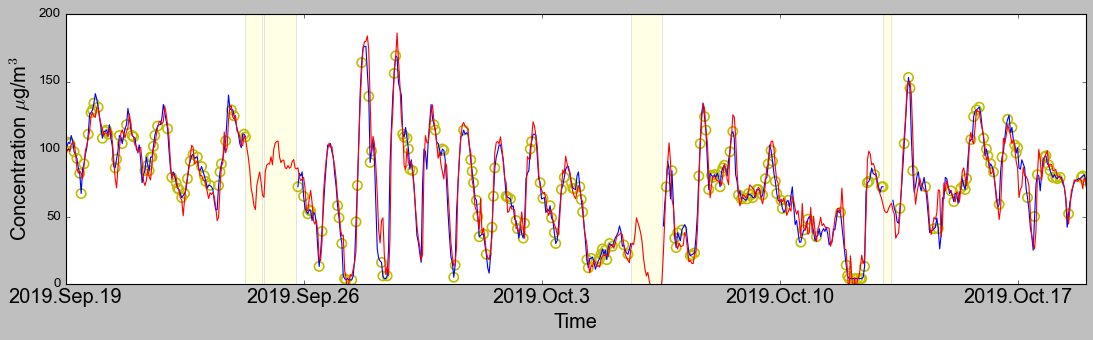

In [24]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

mat_pred = test_mat_pred.reshape((72, 820))
gdt = test_ground_truth.reshape((72, 820))
t_set = test_set.reshape((72, 820))

fig = plt.figure(figsize = (15, 4.5))
plt.style.use('classic')
plt.rcParams['font.family'] = 'Arial'
ax = fig.add_axes([0.18, 0.20, 0.85, 0.75])
# ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
# ax.set_facecolor((1.0, 0.47, 0.42))
pollutant = 5 #66#163#35#67
start_time = 0 #3312
end_time = 820 #3528
array = gdt[pollutant, start_time:end_time]
nonzero = [[]]
pos = np.where(array != 0)
seg = 0
for i in range(len(pos[0])):
    if (i == len(pos[0]) - 1) or (pos[0][i + 1] == pos[0][i] + 1): # continuous
        nonzero[seg].append(pos[0][i])
    if (i != len(pos[0]) - 1) and (pos[0][i + 1] != pos[0][i] + 1): # dis continuous
        nonzero[seg].append(pos[0][i])
        nonzero.append([])
        seg += 1

Scatter_point = []
continuous_seg = []
for i in range(len(nonzero)):
    if len(nonzero[i]) == 1:
        Scatter_point.append(nonzero[i][0])
    else:
        continuous_seg.append(nonzero[i])

for i in range(len(continuous_seg)):
    plt.plot(continuous_seg[i], array[continuous_seg[i]], label = 'concentration', marker='', markerfacecolor='b', markersize=8, color='blue', linewidth=1)
# plt.plot(array[pos], label = 'concentration', marker='', markerfacecolor='blue', markersize=8, color='red', linewidth=2)

# plt.scatter(Scatter_point, array[Scatter_point], facecolors='none', edgecolors='b', s=3)
# plt.plot(test_ground_truth[pollutant, start_time:end_time], label = 'Ground Truth', marker='', markerfacecolor='blue', markersize=8, color='blue', linewidth=1)
array_ground_truth = gdt[pollutant, start_time:end_time]
pos = np.where(array_ground_truth == 0)
zero = [[]]
seg = 0
for i in range(len(pos[0])):
    if (i == len(pos[0]) - 1) or (pos[0][i + 1] == pos[0][i] + 1):
        zero[seg].append(pos[0][i])
    if (i != len(pos[0]) - 1) and (pos[0][i + 1] != pos[0][i] + 1):
        zero[seg].append(pos[0][i])
        zero.append([])
        seg += 1

RM = []
NM = []
for i in range(len(zero)):
    if len(zero[i]) == 1:
        RM.append(zero[i][0])
    else:
        NM.append(zero[i])


# plt.yticks(np.arange(0, 150, 40), [0, 40, 80, 120])
# plt.xticks(np.arange(0, 230, 10))#, [0, 50, 100, 150, 200, 250])
plt.ylim(0, 200)
plt.xlim(0, 720)
ax.set_ylabel("Concentration $\mu$g/m$^3$", fontsize=18)
ax.set_xlabel("Time", fontsize=18)
# ax.set_title("Speed prediction for sensor No.%d"%(pollutant))
# ax.grid(color = 'gray', linestyle = '-', linewidth = 0.4, alpha = 0.5, axis = 'x')
# plt.scatter(RM, array[np.array(RM)], facecolors='none', edgecolors='y', s=30)
array_sparse = t_set[pollutant, start_time:end_time]
pos = np.where((array_sparse == 0) & (array_ground_truth != 0))
# print(pos[0])

plt.scatter(pos, array_ground_truth[pos], facecolors='none', edgecolors='y', s=70, linewidth=1.5)
# for i in range(len(pos[0])):
# #     print(pos[i])
#     plt.axvline(x = pos[0][i], ymin = 0, ymax = 200, label='pyplot vertical line', color = 'yellow', linewidth = 0.4)

plt.plot(mat_pred[pollutant, start_time : end_time], label = 'Predicted', marker='', markerfacecolor='blue', markersize=8, color='red', linewidth=1)

for i in range(len(NM)):
    ax.add_patch(patches.Rectangle((NM[i][0] - 1, 0), NM[i][-1] - NM[i][0] + 1, 200, alpha = 0.1, facecolor = 'yellow'))
plt.xticks(np.arange(0, 720, 168), ["2019.Sep.19",  "2019.Sep.26", 
                                        "2019.Oct.3", "2019.Oct.10", 
                                   "2019.Oct.17"], fontsize=18)
# plt.legend(loc = 'best')
file_n = 'prediction_shanghai_lstmremf_pm0.4' + '.png'
plt.savefig(file_n, bbox_inches = 'tight')
plt.show()

# License

<div class="alert alert-block alert-danger">
<b>This work is released under the MIT license.</b>
</div>